In [1]:
Tasks
1. Data Exploration and Preprocessing
•	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
•	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
•	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.
2. Naive Bayes Model for Text Classification
•	Split the data into training and test sets.
•	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.
•	Train the model on the training set and make predictions on the test set.
3. Sentiment Analysis
•	Choose a suitable library or method for performing sentiment analysis on the blog post texts.
•	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.
•	Examine the distribution of sentiments across different categories and summarize your findings.
4. Evaluation
•	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.
•	Discuss the performance of the model and any challenges encountered during the classification process.
•	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.


In [137]:
import pandas as pd
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [139]:
df = pd.read_csv(r"D:\Admin\Downloads\blogs.csv", encoding='latin-1')

In [140]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


<Axes: xlabel='Labels', ylabel='count'>

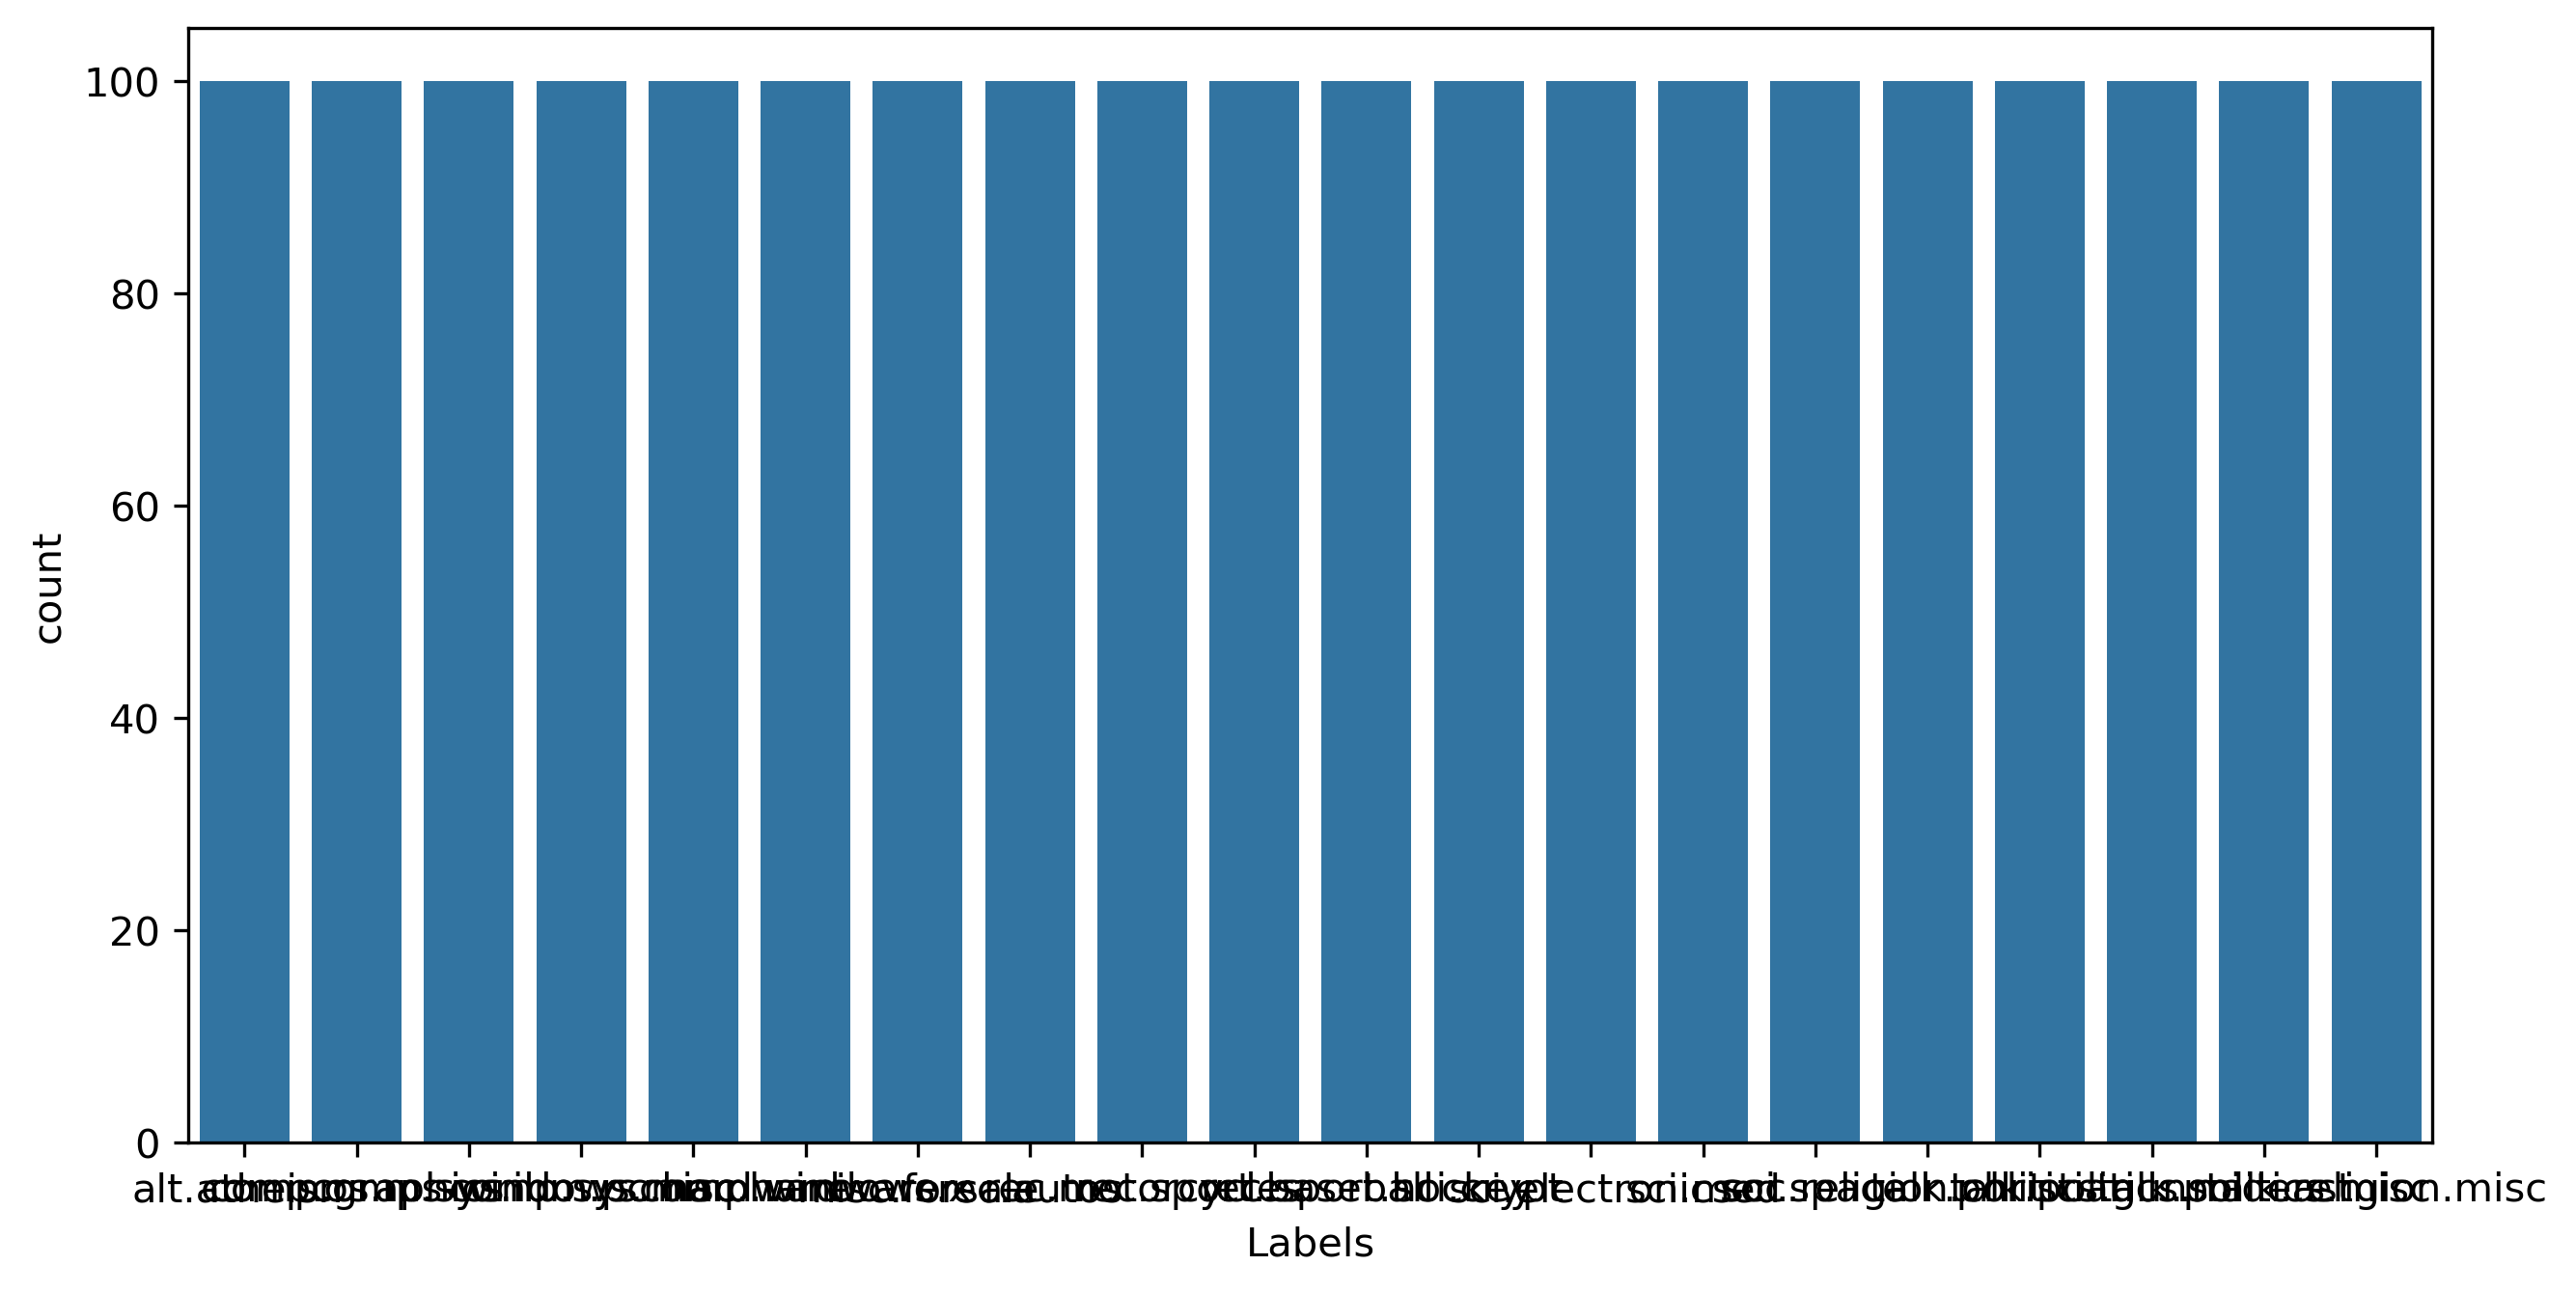

In [143]:
sns.countplot(x = df['Labels'])


In [144]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [145]:
df.isna().sum()

Data      0
Labels    0
dtype: int64

In [149]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [151]:
df.tail()

,Data,Labels
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1999,Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...,talk.religion.misc


In [153]:
#•	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content

In [155]:
df['type'] = df['Labels'].map({'alt.atheism':1,'talk.religion.misc':0})

In [157]:
df

,Data,Labels,type
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1.0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,1.0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,1.0
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,0.0
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,0.0
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,0.0
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,0.0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    2000 non-null   object 
 1   Labels  2000 non-null   object 
 2   type    200 non-null    float64
dtypes: float64(1), object(2)
memory usage: 47.0+ KB


In [162]:
df.fillna('type')

,Data,Labels,type
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1.0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,1.0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,1.0
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,0.0
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,0.0
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,0.0
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,0.0


In [164]:
df.isna()

,Data,Labels,type
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1995,False,False,False
1996,False,False,False
1997,False,False,False
1998,False,False,False


In [166]:
#finding the null values and fill them with the mode values

In [168]:
nan=df['type'].isnull()
nan

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: type, Length: 2000, dtype: bool

In [170]:
df['type'].isnull().sum()
df

,Data,Labels,type
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1.0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,1.0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,1.0
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,0.0
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,0.0
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,0.0
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,0.0


In [172]:
df['type'].fillna(df['type'].mode()[0], inplace=True)
df

,Data,Labels,type
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1.0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,1.0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,1.0
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,0.0
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,0.0
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,0.0
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,0.0


In [174]:
df.describe()

,type
count,2000.000000
mean,0.050000
std,0.217999
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [176]:
df[df['Labels'] == 'alt.atheism']

,Data,Labels,type
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1.0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,1.0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,1.0
...,...,...,...
95,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1.0
96,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,1.0
97,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism,1.0
98,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1.0


In [178]:
df[df['Labels']=='talk.religion.misc']

,Data,Labels,type
1900,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,0.0
1901,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,talk.religion.misc,0.0
1902,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,0.0
1903,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,0.0
1904,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,0.0
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,0.0
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,0.0
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,0.0
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,0.0


In [180]:
atheism	 = df[df['Labels'] == 'alt.atheism']
religionmisc = df[df['Labels'] == 'talk.religion.misc']

In [182]:
atheism

,Data,Labels,type
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1.0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,1.0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,1.0
...,...,...,...
95,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1.0
96,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,1.0
97,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism,1.0
98,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1.0


In [184]:
religionmisc

,Data,Labels,type
1900,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,0.0
1901,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,talk.religion.misc,0.0
1902,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,0.0
1903,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,0.0
1904,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,0.0
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,0.0
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,0.0
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,0.0
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,0.0


In [186]:
# visualization for the better understanding of the given data set with help of world cloud

In [188]:
!pip install wordcloud

In [189]:
atheism['Data']

0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...
                            ...                        
95    Newsgroups: alt.atheism\nPath: cantaloupe.srv....
96    Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
97    Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....
98    Newsgroups: alt.atheism\nPath: cantaloupe.srv....
99    Newsgroups: alt.atheism\nPath: cantaloupe.srv....
Name: Data, Length: 100, dtype: object

In [190]:
religionmisc['Data']

1900    Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
1901    Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...
1902    Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1903    Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
1904    Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
                              ...                        
1995    Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
1996    Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1997    Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...
1998    Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1999    Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...
Name: Data, Length: 100, dtype: object

In [191]:
def worldcl(data,heading):
    txt = ' '.join(data['Data'])
    wc = WordCloud(background_color='white',width=700, height=200,
                  colormap='viridis').generate(txt)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(heading)

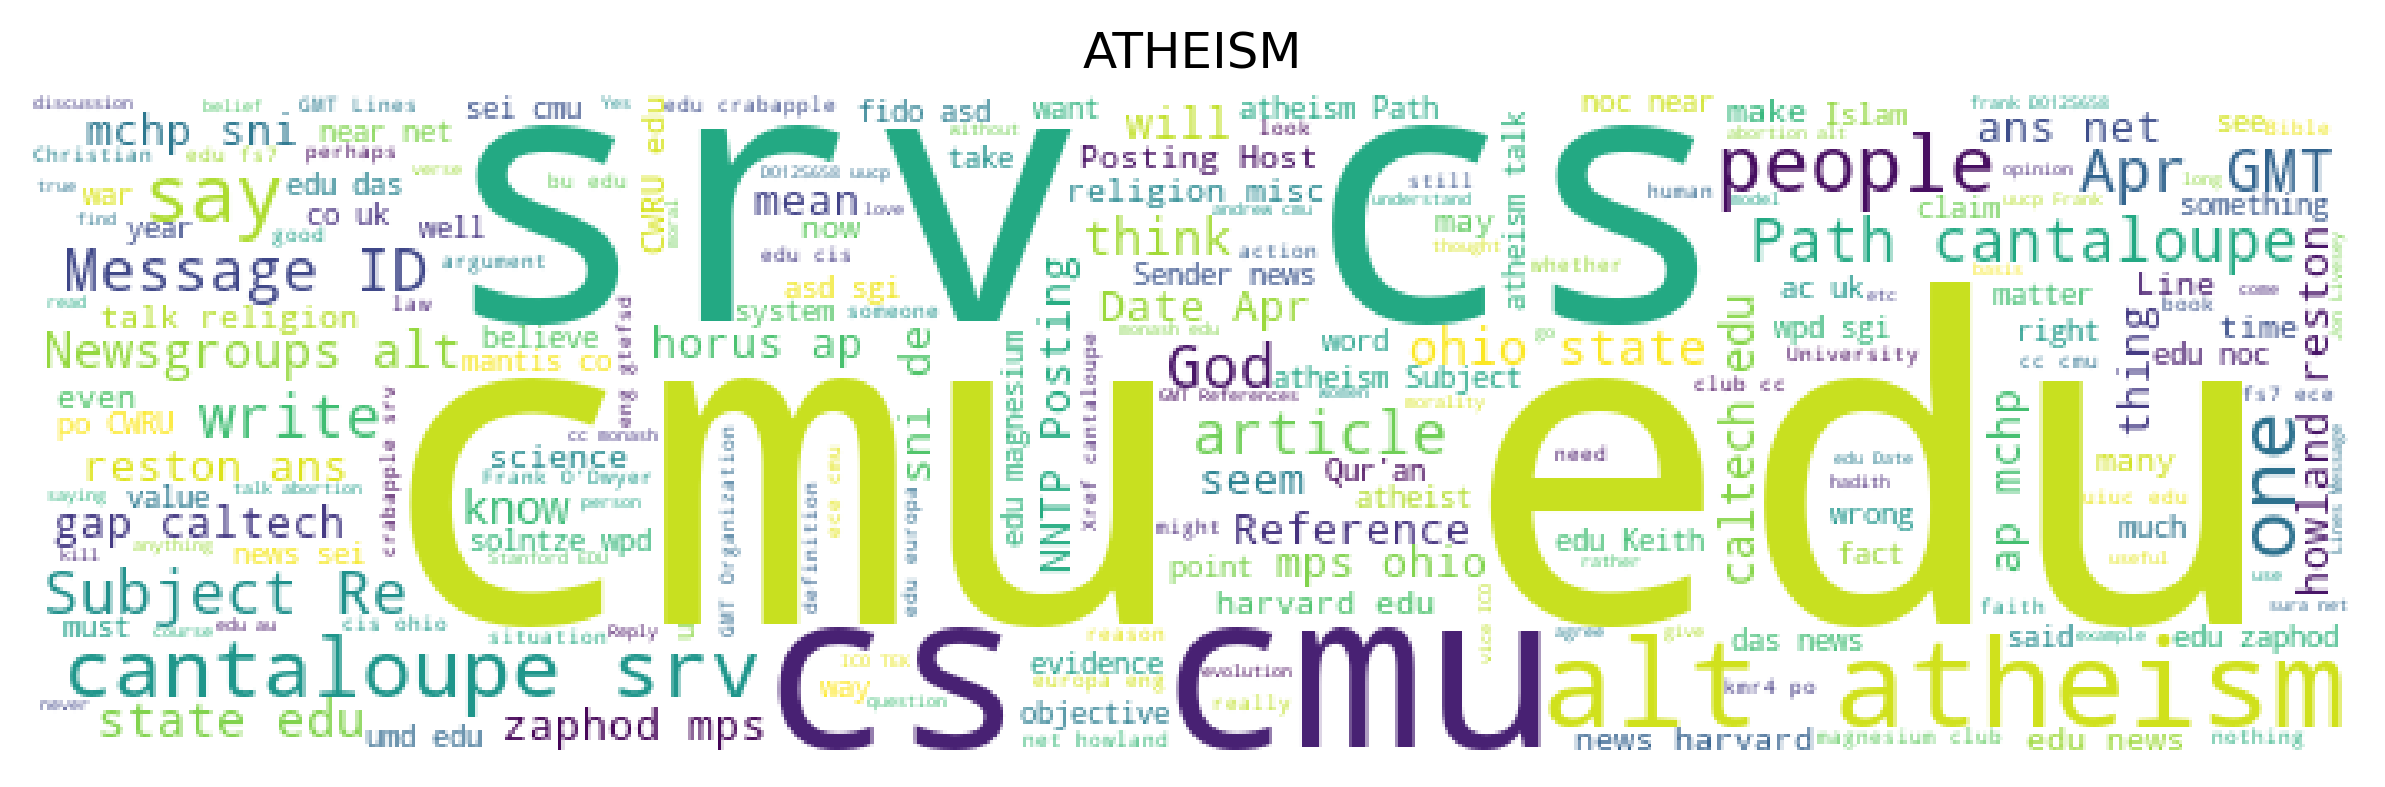

In [192]:
worldcl(atheism,'ATHEISM')

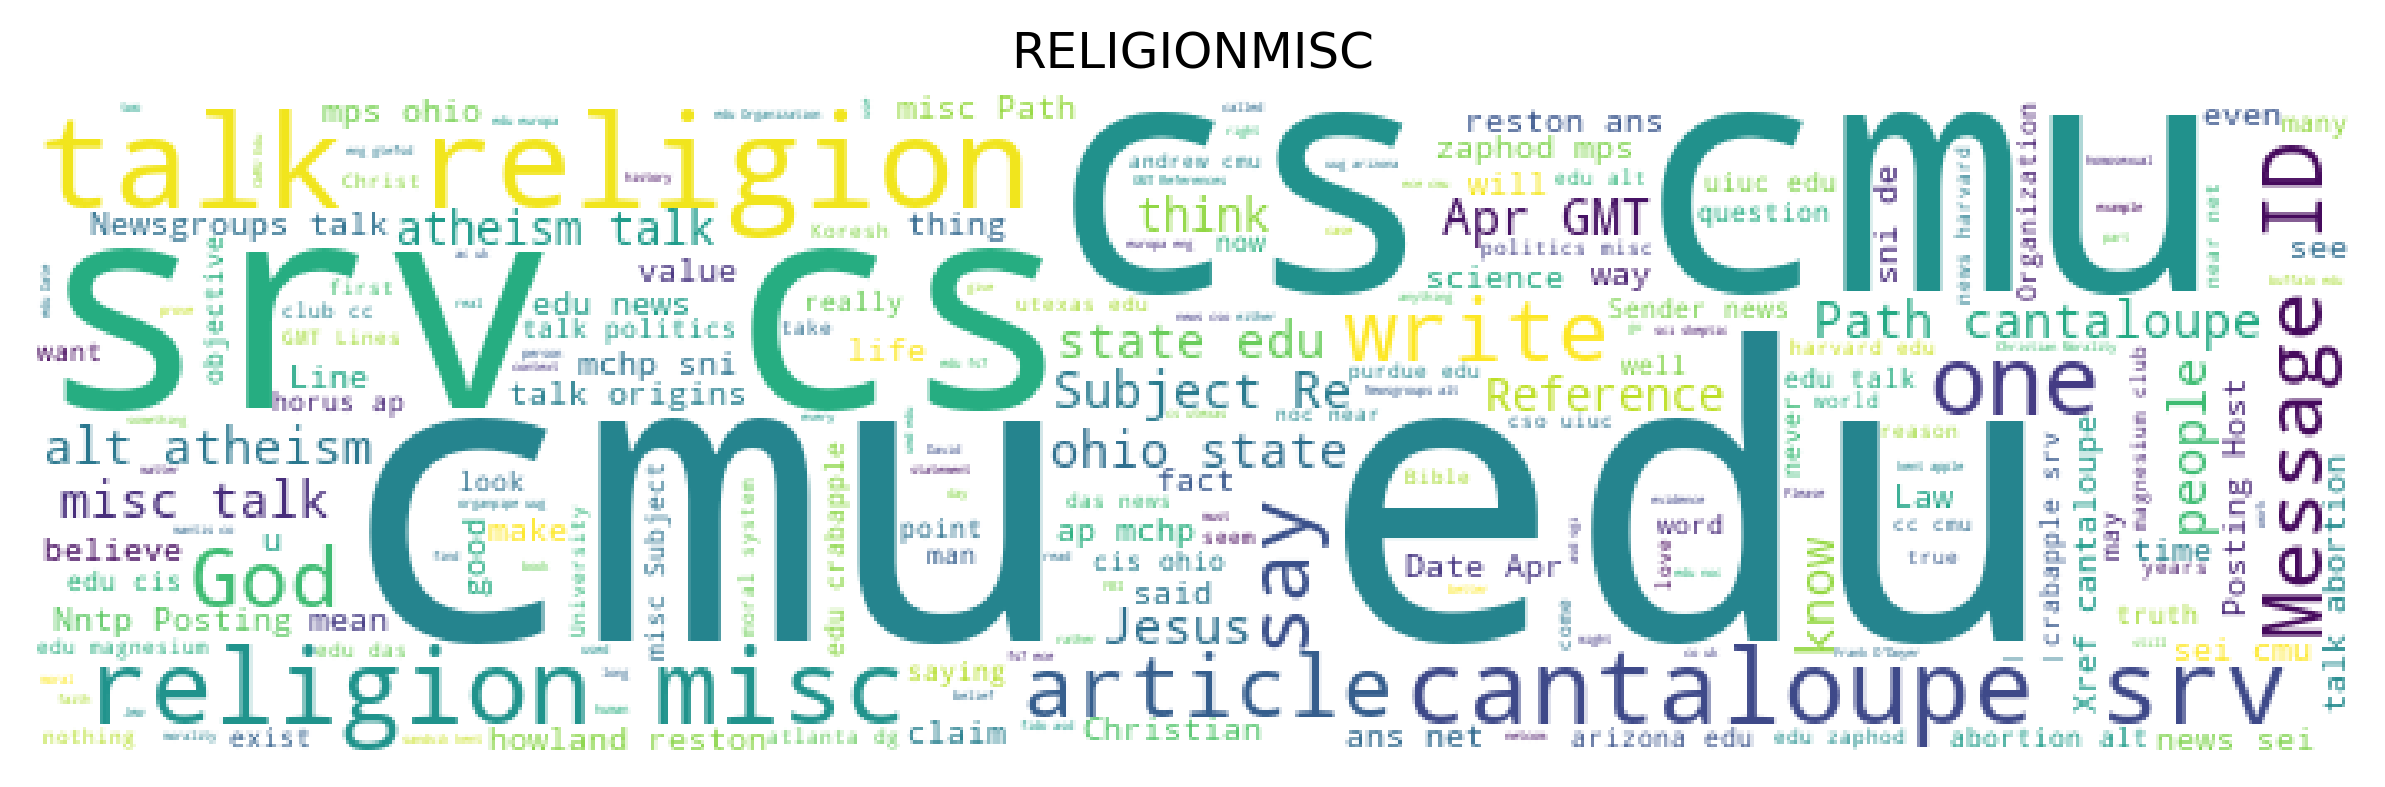

In [193]:
worldcl(religionmisc,'RELIGIONMISC')

In [194]:
df

,Data,Labels,type
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1.0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,1.0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,1.0
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,0.0
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,0.0
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,0.0
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,0.0


In [195]:
#lemmatization for cleaning the text data

In [196]:
lemma = WordNetLemmatizer()

In [197]:
df['Data'][0]

'Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank\nFrom: frank@D012S658.uucp (Frank O\'Dwyer)\nNewsgroups: alt.atheism\nSubject: Re: islamic genocide\nDate: 23 Apr 1993 23:51:47 GMT\nOrganization: Siemens-Nixdorf AG\nLines: 110\nDistribution: world\nMessage-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>\nReferences: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>\nNNTP-Posting-Host: d012s658.ap.mchp.sni.de\n\nIn article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O\'Dwyer) writes:\n#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#|> #\n#|> #Noting that a particular society, in this case the mainland UK,

In [198]:
range(len(df))

range(0, 2000)

In [199]:
#using list compression for removal of the stop words , lemmatization, text normalization and word tokenization

In [204]:
corpus = []

for i in range(len(df)):
    msg = re.sub('[^a-zA-Z]',' ',df['Data'][i]) #Clean the text
    msg = msg.lower() #Text normalization
    msg = msg.split() #Word tokenize
    msg = [lemma.lemmatize(i) for i in msg if i not in stopwords.words('english')] #Lemmatization
    msg = ' '.join(msg) # Join sentences
    corpus.append(msg)

In [205]:
corpus


['path cantaloupe srv c cmu edu magnesium club cc cmu edu news sei cmu edu ci ohio state edu zaphod mp ohio state edu howland reston an net agate doc ic ac uk uknet mcsun germany eu net thoth mchp sni de horus ap mchp sni de frank frank uucp frank dwyer newsgroups alt atheism subject islamic genocide date apr gmt organization siemens nixdorf ag line distribution world message id r vej k horus ap mchp sni de reference r qe fido asd sgi com r ubl bd horus ap mchp sni de r ek uo fido asd sgi com nntp posting host ap mchp sni de article r ek uo fido asd sgi com livesey solntze wpd sgi com jon livesey writes article r ubl bd horus ap mchp sni de frank uucp frank dwyer writes article r qe fido asd sgi com livesey solntze wpd sgi com jon livesey writes noting particular society case mainland uk religously motivated murder murder kind say little whether inter religion murder elsewhere religiously motivated allows one conclude nothing inherent religion matter catholicism protestantism motivates

In [206]:
df

,Data,Labels,type
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1.0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,1.0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,1.0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,1.0
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,0.0
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,0.0
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,0.0
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,0.0


In [207]:
#model evalution 

In [209]:
y = df['type']
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
Name: type, Length: 2000, dtype: float64

In [217]:
#using tf-IDF 

In [218]:
tf = TfidfVectorizer()

x_data = tf.fit_transform(corpus)
x_data = x_data.toarray()
x_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [219]:
#Evaluation
•	#Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.
•	#Discuss the performance of the model and any challenges encountered during the classification process.
•	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.


SyntaxError: invalid character '•' (U+2022) (2347397250.py, line 2)

In [226]:
xtrain,xtest,ytrain,ytest = train_test_split(x_data,y,test_size=0.2, random_state=1)

In [228]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)

print(f"Train Accuracy: {nb.score(xtrain,ytrain)}\nTest Accuracy: {nb.score(xtest,ytest)}")

Train Accuracy: 0.948125
Test Accuracy: 0.9575


In [230]:
from sklearn.metrics import classification_report

In [232]:
classification_report(ytest,ypred)

'              precision    recall  f1-score   support\n\n         0.0       0.96      1.00      0.98       383\n         1.0       0.00      0.00      0.00        17\n\n    accuracy                           0.96       400\n   macro avg       0.48      0.50      0.49       400\nweighted avg       0.92      0.96      0.94       400\n'

In [248]:
#. Sentiment Analysis


In [236]:
!pip install textblob

In [237]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(Data):
    analysis = TextBlob(Data)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis
df['sentiment'] = df['Data'].apply(get_sentiment)

In [239]:
get_sentiment('Data')

'neutral'

In [242]:
df['sentiment']

0       positive
1       negative
2       positive
3       positive
4       positive
          ...   
1995    positive
1996    positive
1997    positive
1998    positive
1999    positive
Name: sentiment, Length: 2000, dtype: object

In [244]:
sentiment_distribution = df.groupby(['Data', 'sentiment']).size().unstack(fill_value=0)


In [246]:
sentiment_distribution

sentiment                                           negative  positive
Data                                                                  
From: bressler@iftccu.ca.boeing.com (Rick Bress...         0         1
From: bressler@iftccu.ca.boeing.com (Rick Bress...         0         1
From: chrisa@hpwarr.hp.com ( Chris Almy)\nDate:...         0         1
From: david@trsvax.tandy.com\nDate: 23 Apr 93 1...         1         0
From: lynch@hpcc01.corp.hp.com (Howard Lynch)\n...         0         1
...                                                      ...       ...
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...         1         0
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...         0         1
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...         0         1
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...         0         1
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...         0         1

[2000 rows x 2 columns]